In [ ]:
#phase I

Epoch 1/10
250/250 [==============================] - 50s 181ms/step - loss: 0.4367 - accuracy: 0.8199 - val_loss: 0.1203 - val_accuracy: 0.9725
Epoch 2/10
250/250 [==============================] - 43s 172ms/step - loss: 0.0543 - accuracy: 0.9875 - val_loss: 0.0522 - val_accuracy: 0.9865
Epoch 3/10
250/250 [==============================] - 43s 172ms/step - loss: 0.0095 - accuracy: 0.9984 - val_loss: 0.0533 - val_accuracy: 0.9870
Epoch 4/10
250/250 [==============================] - 43s 171ms/step - loss: 0.0038 - accuracy: 0.9992 - val_loss: 0.0499 - val_accuracy: 0.9915
Epoch 5/10
250/250 [==============================] - 43s 171ms/step - loss: 0.0034 - accuracy: 0.9992 - val_loss: 0.0493 - val_accuracy: 0.9885
Epoch 6/10
250/250 [==============================] - 43s 171ms/step - loss: 0.0021 - accuracy: 0.9994 - val_loss: 0.0480 - val_accuracy: 0.9910
Epoch 7/10
250/250 [==============================] - 43s 171ms/step - loss: 0.0021 - accuracy: 0.9994 - val_loss: 0.0796 - val_ac

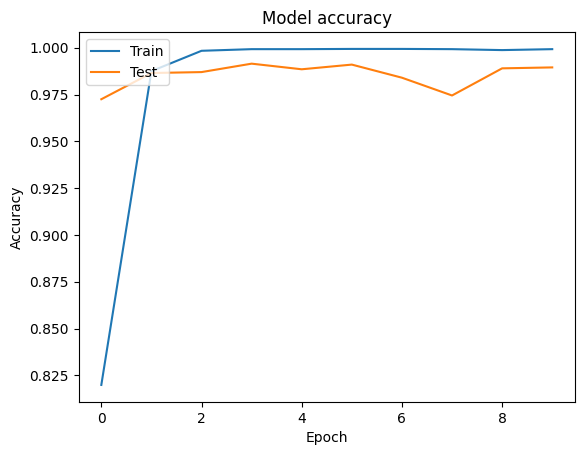

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,Reshape
import matplotlib.pyplot as plt

# Load URL dataset
url_df = pd.read_csv('url.csv')

# Preprocess dataset with TF-IDF vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(url_df['Domain'])
y = url_df['Label']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train = X_train.toarray()
X_test = X_test.toarray()

# Define model architecture
model = Sequential()
model.add(Dense(128, input_shape=(X_train.shape[1],)))
model.add(Reshape((128, 1)))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on training data
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Plot the accuracy during training
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [ ]:
#phase II

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.feature_extraction.text import CountVectorizer

from pyswarms.single import GlobalBestPSO


# Load the dataset (assuming it is in a CSV file)
data = np.genfromtxt('url.csv', delimiter=',', dtype=None, encoding=None, names=True)

# Extract features and labels from the dataset
X = data['Domain']
y = data['Label']


# Encode labels as integers (0 for benign, 1 for malicious)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert domain names to numerical features using count vectorization
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train).toarray()
X_test = vectorizer.transform(X_test).toarray()

# Define the SVM classifier
svm = SVC()


# Define the fitness function for PSO
def fitness_function(particles):
    # Extract the hyperparameters from particles
    C = particles[0][0]  # SVM regularization parameter
    gamma = particles[0][1]  # RBF kernel parameter

    # Set the SVM hyperparameters
    svm.set_params(C=C, gamma=gamma)

    # Train the SVM classifier
    svm.fit(X_train, y_train)

    # Predict the labels for the test set
    y_pred = svm.predict(X_test)

    # Calculate the accuracy score as fitness value
    accuracy = accuracy_score(y_test, y_pred)

    return -accuracy  # Negative value for maximization problem


# Define the bounds for the hyperparameters (C and gamma)
bounds = (np.array([1e-6, 1e-6]), np.array([100.0, 10.0]))

# Run PSO optimization
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
optimizer = GlobalBestPSO(n_particles=10, dimensions=2, bounds=bounds, options=options)
best_cost, best_pos = optimizer.optimize(fitness_function, iters=5)

# Extract the best hyperparameters
best_C = best_pos[0]
best_gamma = best_pos[1]

# Set the SVM classifier with the best hyperparameters
svm.set_params(C=best_C, gamma=best_gamma)

# Train the SVM classifier with the best hyperparameters
svm.fit(X_train, y_train)

# Predict the labels for the test set using the trained SVM
y_pred = svm.predict(X_test)

# Calculate the accuracy score of the final model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


2023-05-20 19:25:57,692 - pyswarms.single.global_best - INFO - Optimize for 5 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|5/5, best_cost=-.899
2023-05-20 19:32:31,412 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.8995, best pos: [31.61672366  3.74670799]


Accuracy: 0.8995


In [ ]:
#phase III

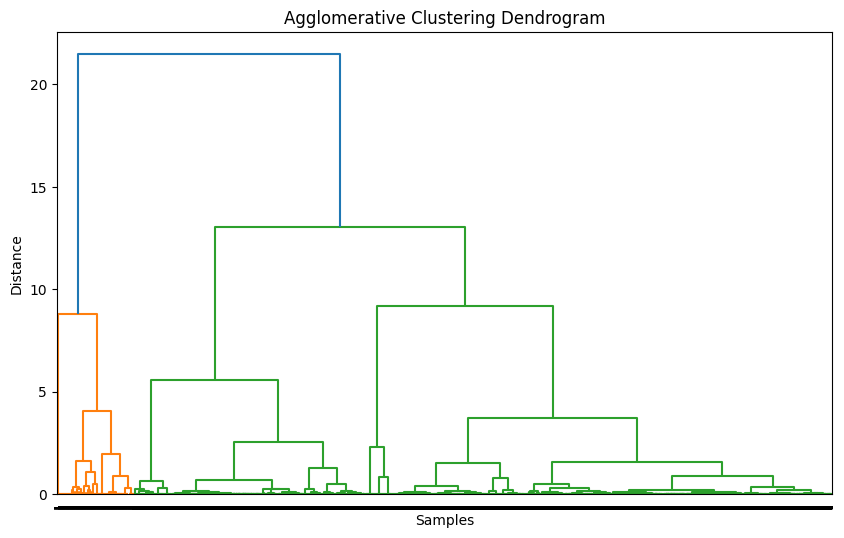

In [1]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the dataset
df = pd.read_csv('url.csv')

# Extract the domain names
X = df['Domain']

# Convert domain names to numerical features using TF-IDF vectorization
vectorizer = TfidfVectorizer()
X_features = vectorizer.fit_transform(X)

# Perform dimensionality reduction using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_features.toarray())

# Perform agglomerative clustering
clustering = AgglomerativeClustering(n_clusters=2, linkage='ward')
clusters = clustering.fit_predict(X_pca)

# Perform hierarchical clustering and obtain the linkage matrix
Z = linkage(X_pca, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z, labels=clusters)
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.title('Agglomerative Clustering Dendrogram')
plt.show()
